<a href="https://colab.research.google.com/github/therahulmehta/MNIST_classification/blob/master/mutilabel_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# view the keys for 70,000 images with 784 features
# 28 x 28 px
# pixel intensity from 0 to 255
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

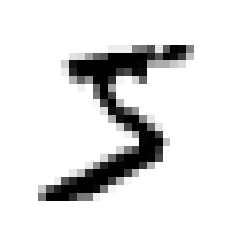

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap ="binary")
plt.axis("off")
plt.show()

In [5]:
import numpy as np
# cast data to int
y = y.astype(np.uint8)

# split train and test (data already shuffled)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# training multilabel split data
from sklearn.neighbors import KNeighborsClassifier 

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)

# two target label for each image: first tells you weather the digit is large 
# (7,8,9) and second tells you if it's odd
y_multilabel = np.c_[y_train_large, y_train_odd]

#create classifier and train with targets
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
#make prediction 
knn_clf.predict([some_digit])

# 5 is not large and it is odd

array([[False,  True]])